In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.utils import to_categorical 
from keras import backend as K
from keras.layers import Dense, Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers.core import Activation

In [3]:
traindata = pd.read_csv('sign_mnist_train.csv')
print(traindata.shape)
traindata.head()

(27455, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
y_train=traindata['label'].values
print(y_train)

[ 3  6  2 ... 18 17 23]


In [5]:
traindata.drop('label',axis=1,inplace=True)

In [6]:
testdata = pd.read_csv('sign_mnist_test.csv')
print(testdata.shape)
testdata.head()

(7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [7]:
y_test=testdata['label'].values
print(y_test)

[ 6  5 10 ...  2  4  2]


In [8]:
testdata.drop('label',axis=1,inplace=True)

In [9]:
testdata.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [10]:
x_train=traindata.values
x_test=testdata.values
unique_val = np.array(y_train)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [11]:
x_train=np.array(x_train.reshape(-1,28,28,1))
x_test=np.array(x_test.reshape(-1,28,28,1))

In [12]:
print(x_train.shape)
print(x_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [13]:
from sklearn.preprocessing import LabelBinarizer
lb_train= LabelBinarizer()
lb_test=LabelBinarizer()
y_train=lb_train.fit_transform(y_train)
y_test=lb_test.fit_transform(y_test)

In [14]:
print(y_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [15]:
print(y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


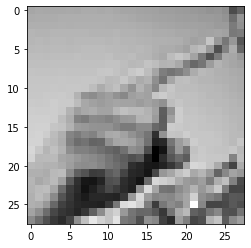

In [16]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1].reshape(28,28),cmap='gray')

In [17]:
# Convert them into black or white: [0, 1]
x_train=x_train/255
x_test=x_test/255

In [18]:
print(x_train.shape,y_train.shape)

(27455, 28, 28, 1) (27455, 24)


In [19]:
classifier = Sequential()
# First convolutional layer 1 accepts image input
classifier.add(Conv2D(filters=7, kernel_size=(3,3),strides=(1,1),padding='same',input_shape=(28,28,1),activation='relu', data_format='channels_last'))
# Add a max pooling layer
classifier.add(MaxPooling2D(pool_size=(2,2)))


# Add a convolutional 2 layer
classifier.add(Conv2D(filters=9, kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
# Add another max pooling layer
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.25))

# Flatten and feed to output layer
classifier.add(Flatten())
classifier.add(Dense(9,activation = 'relu'))
classifier.add(Dropout(0.25))
classifier.add(Dense(24,activation = 'softmax'))




In [20]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 7)         70        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 7)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 9)         576       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 9)           0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 9)           0         
_________________________________________________________________
flatten (Flatten)            (None, 441)               0         
_________________________________________________________________
dense (Dense)                (None, 9)                 3

In [21]:
from keras.callbacks import *

In [22]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.01)

In [23]:
#Compile the model
classifier.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [24]:
#Train the model
hist = classifier.fit(x_train, y_train,validation_split=0.10,epochs=10,batch_size=4)

Epoch 1/10
6178/6178 [==============================] - 53s 9ms/step - loss: 3.1816 - accuracy: 0.0460 - val_loss: 3.1865 - val_accuracy: 0.0452
Epoch 2/10
6178/6178 [==============================] - 43s 7ms/step - loss: 3.1816 - accuracy: 0.0443 - val_loss: 3.1829 - val_accuracy: 0.0477
Epoch 3/10
6178/6178 [==============================] - 49s 8ms/step - loss: 3.1817 - accuracy: 0.0449 - val_loss: 3.1840 - val_accuracy: 0.0419
Epoch 4/10
6178/6178 [==============================] - 42s 7ms/step - loss: 3.1821 - accuracy: 0.0446 - val_loss: 3.1826 - val_accuracy: 0.0477
Epoch 5/10
6178/6178 [==============================] - 40s 6ms/step - loss: 3.1823 - accuracy: 0.0429 - val_loss: 3.1798 - val_accuracy: 0.0452
Epoch 6/10
6178/6178 [==============================] - 41s 7ms/step - loss: 3.1815 - accuracy: 0.0451 - val_loss: 3.1834 - val_accuracy: 0.0386
Epoch 7/10
6178/6178 [==============================] - 40s 7ms/step - loss: 3.1821 - accuracy: 0.0440 - val_loss: 3.1824 - val_ac

In [25]:
accuracy = classifier.evaluate(x=x_test,y=y_test,batch_size=32)
print("Accuracy: ",accuracy[1])

225/225 [==============================] - 2s 9ms/step - loss: 3.2014 - accuracy: 0.0343
Accuracy:  0.0343000553548336


In [26]:
print('Test loss:', y_test[0])
print('Test accuracy:', y_test[1])

Test loss: [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Test accuracy: [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


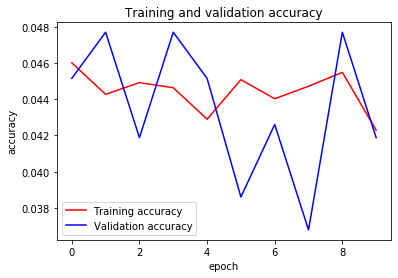

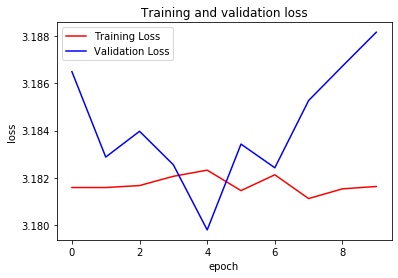

In [27]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
plt.xlabel('epoch')
plt.ylabel('accuracy')
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
rounded_predictions = classifier.predict_classes(x_test, batch_size=32, verbose=0)
rounded_predictions[1]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


13

In [29]:
from sklearn.metrics import classification_report

history = classifier.fit(x_train, y_train, batch_size=32, epochs=5, verbose=1,validation_split=0.10, shuffle=True)
pred = classifier.predict(x_test, batch_size=32, verbose=1)
predicted = np.argmax(pred, axis=1)
report = classification_report(np.argmax(y_test, axis=1), predicted,zero_division=1)
print(report)

Epoch 1/5
773/773 [==============================] - 15s 20ms/step - loss: 3.1773 - accuracy: 0.0458 - val_loss: 3.1782 - val_accuracy: 0.0499
Epoch 2/5
773/773 [==============================] - 15s 19ms/step - loss: 3.1767 - accuracy: 0.0461 - val_loss: 3.1774 - val_accuracy: 0.0477
Epoch 3/5
773/773 [==============================] - 16s 21ms/step - loss: 3.1774 - accuracy: 0.0457 - val_loss: 3.1780 - val_accuracy: 0.0499
Epoch 4/5
773/773 [==============================] - 14s 19ms/step - loss: 3.1774 - accuracy: 0.0469 - val_loss: 3.1797 - val_accuracy: 0.0368
Epoch 5/5
225/225 [==============================] - 2s 8ms/step
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       331
           1       1.00      0.00      0.00       432
           2       1.00      0.00      0.00       310
           3       1.00      0.00      0.00       245
           4       1.00      0.00      0.00       498
           5       1.00      0.00     